<a href="https://colab.research.google.com/github/varsha595/QUANTUM-COMPUTING-PROJECT/blob/main/problemstatement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00

One target: Targets = ['101'] | Success = 77.05%


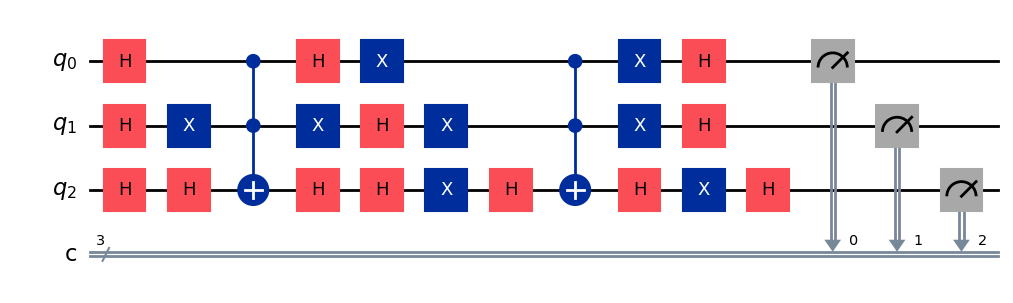


Two targets: Targets = ['101', '010'] | Success = 100.00%


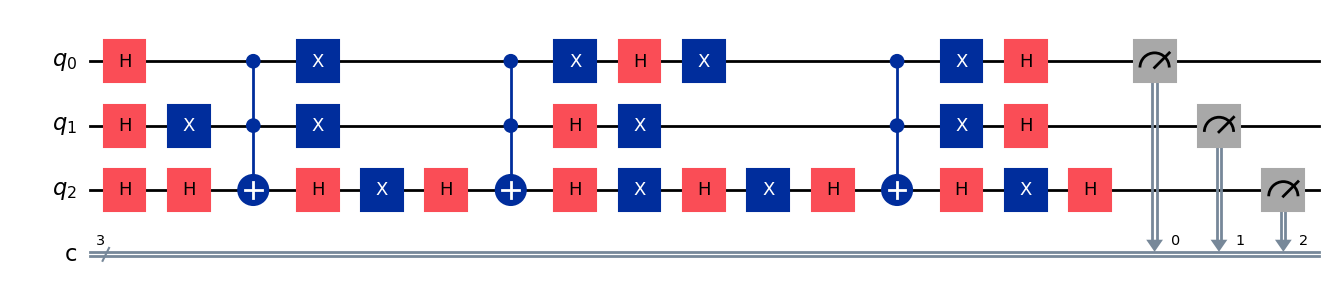


Three targets: Targets = ['001', '101', '110'] | Success = 35.64%


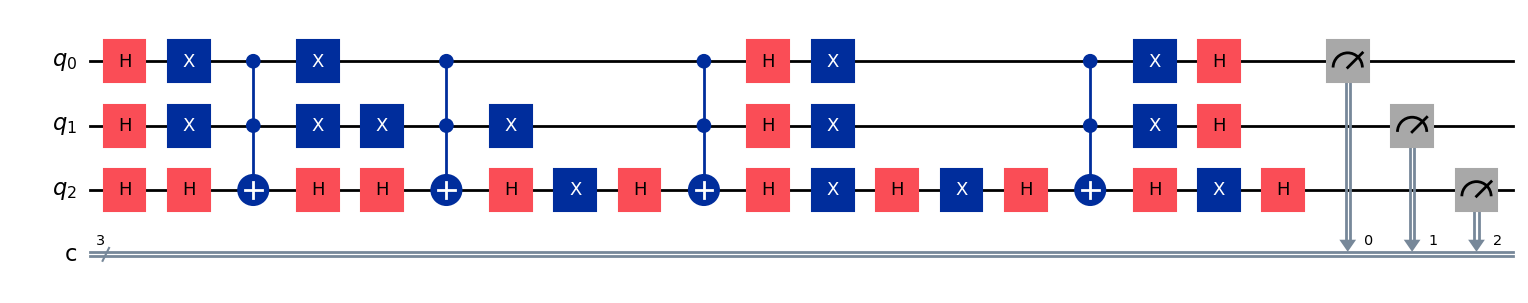


Four targets: Targets = ['000', '011', '101', '110'] | Success = 48.54%


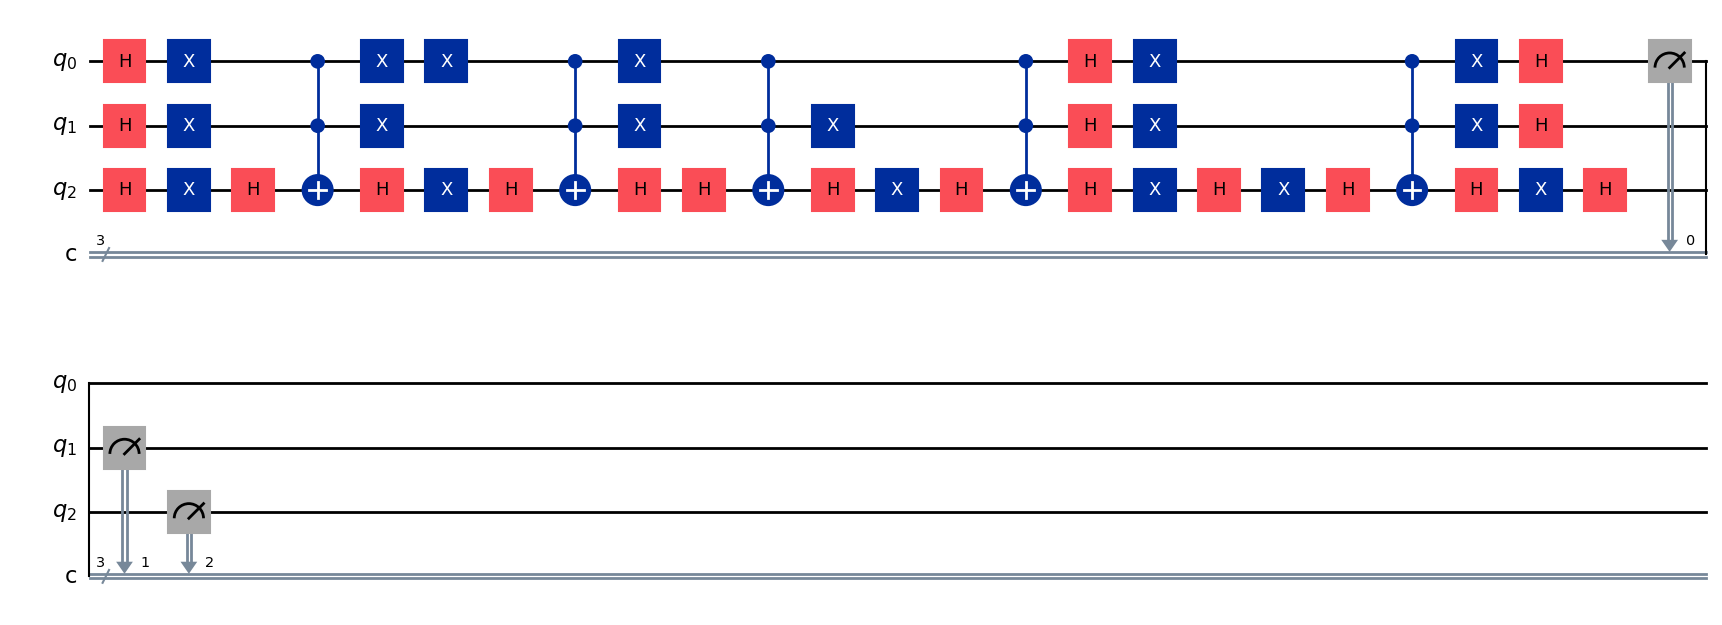

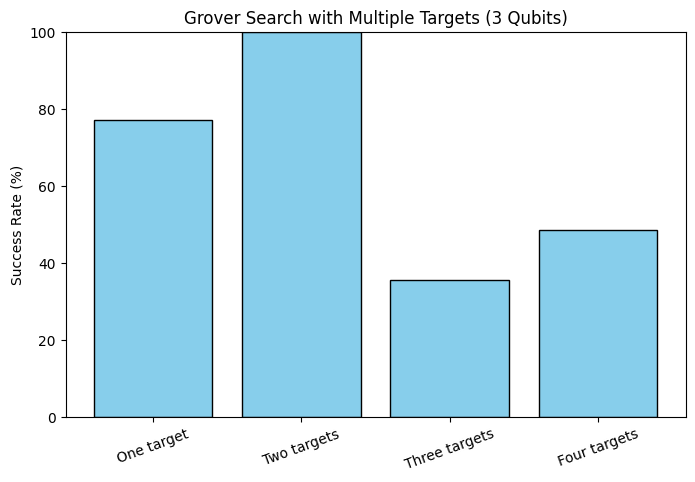

In [ ]:
# --- INSTALL REQUIRED PACKAGES ---
# Run this only once per environment
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Function: Grover for multiple targets ---
def grover_multi_target(targets):
    qc = QuantumCircuit(3, 3)

    # Step 1: Create superposition
    qc.h([0, 1, 2])

    # Step 2: Oracle for multiple target states
    for t in targets:
        for i, bit in enumerate(t):
            if bit == '0':
                qc.x(i)
        qc.h(2)
        qc.ccx(0, 1, 2)
        qc.h(2)
        for i, bit in enumerate(t):
            if bit == '0':
                qc.x(i)

    # Step 3: Diffusion operator
    qc.h([0, 1, 2])
    qc.x([0, 1, 2])
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x([0, 1, 2])
    qc.h([0, 1, 2])

    # Step 4: Measure
    qc.measure([0, 1, 2], [0, 1, 2])
    return qc


# --- Define test cases ---
scenarios = {
    "One target": ['101'],
    "Two targets": ['101', '010'],
    "Three targets": ['001', '101', '110'],
    "Four targets": ['000', '011', '101', '110']
}

sim = AerSimulator()
shots = 1024
results = {}

# --- Run experiments ---
for name, tlist in scenarios.items():
    qc = grover_multi_target(tlist)
    job = sim.run(transpile(qc, sim), shots=shots)
    counts = job.result().get_counts()
    success = sum(counts.get(t, 0) for t in tlist)
    rate = (success / shots) * 100
    results[name] = rate

    print(f"\n{name}: Targets = {tlist} | Success = {rate:.2f}%")

    # --- Display Circuit (safe mode) ---
    try:
        display(qc.draw(output='mpl'))
    except Exception as e:
        print("(Matplotlib drawer unavailable, showing text circuit instead)")
        print(qc.draw())

    # --- Plot Histogram ---
    plot_histogram(counts, title=f"Measurement Results - {name}")
    plt.show()

# --- Plot Success Rates ---
names = list(results.keys())
rates = list(results.values())

plt.figure(figsize=(8, 5))
plt.bar(names, rates, color='skyblue', edgecolor='black')
plt.ylabel('Success Rate (%)')
plt.title('Grover Search with Multiple Targets (3 Qubits)')
plt.xticks(rotation=20)
plt.ylim(0, 100)
plt.show()
